# Projeto Final NLP: Parte I - Pré-processamentos

Trainee: Vitoria Rodrigues Silva

Um agradecimento especial a minha mentora preferida Julia Pocciotti: você é maravilhosa e inteligentíssima. Minha inspiração! Obrigada especialmente pela paciência com as várias mensagens que eu mandava e depois apagava porque tinha conseguido resolver rs 

Ao meu mentor preferido Azank, obrigada por sempre ouvir minhas dúvidas e ideias malucas e pela paciência com as mil vezes em que peço desculpas.

Obrigada ao Gui, que também fez o projeto e sofreu junto comigo.

Vcs são top <3

# IMDB Dataset

Para esta parte do trabalho foi designado que trabalharíamos com o IMDB Dataset que possui 50 mil reviews de filmes para fins de processamento de linguagem natural ou análise de textos.  Então vamos começar importando e lendo nossos dados:

In [ ]:
#importando as bibliotecas para leitura 
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt

In [ ]:
#lendo o arquivo 
df = pd.read_csv('IMDB Dataset.csv')
df.head(7)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive


## Checando o DataFrame

Embora pareça estar tudo okay com esse dataframe, vamos printar algumas informações só para ter certeza absoluta:

In [ ]:
df.info() #informações do dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.isnull().sum() #checando se o df possui dados nulos

review       0
sentiment    0
dtype: int64

In [ ]:
df.nunique() #checando os valores únicos por coluna

review       49582
sentiment        2
dtype: int64

Só por curiosidade mesmo eu decidi plotar um gráfico para ver as distribuições da coluna 'sentiment', fique surpresa por estar dividido 50% para cada. Interessante!

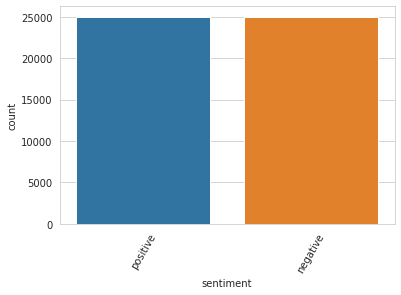

In [ ]:
sns.set_style('whitegrid')
plt.xticks(rotation=60)
sns.countplot(df['sentiment'])

plt.show()

Já que tudo parece certo em ambas as colunas numa primeira vista vamos partir para o pré-processamento.

# 1) Pré-Processamento

O pré-processamento de um texto ajuda na obtenção de melhores resultados ao executar aprendizados de máquina ou outros métodos estatísticos. São muitos os métodos de pré-processamento, mas os que foram solicitados para esse projeto foram:
* Remover tags com HTML: pra isso vamos usar a biblioteca BeautifulSoup, mais especificamente a função `get_text()` que nos retornará somente o texto da coluna ignorando as tags
* Usar regex para selecionar apenas letras, ignorando pontuação 
* Colocar todas palavras com letras minúsculas
* Remover stopwords, como 'a', 'o', etc
* Stematizar e Lematizar o texto, mantendo aspenas as raízes das palavras


Então vamos lá! Vou fazer uma função que cumpra todas essas etapas e aplicá-la a coluna "review":

In [ ]:
#importando as bibliotecas necessárias 
from bs4 import BeautifulSoup  
import re
from nltk.tokenize import word_tokenize 
import nltk
import spacy 

In [ ]:
#o colab exigiu que eu baixasse stopwords então:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
spc_en = spacy.load('en')

#função que realiza todas as etapas acima
def pre_processamento(texto):

  #remove as tags
  soup = BeautifulSoup(texto)
  texto_sem_tags = soup.get_text()

  #transforma as letras em minúsculas
  texto_min = texto_sem_tags.lower()

  #seleciona apenas letras
  apenas_letras = re.findall(r'[a-z]+', texto_min)
  
  #removendo as stopwords
  stopwords = nltk.corpus.stopwords.words('english')
  sem_stopwords = set(stopwords)
  palavras_importantes = []
  for palavras in apenas_letras:
    if palavras not in stopwords:
      palavras_importantes.append(palavras)

  palavras_importantes_string = " ".join(palavras_importantes)
  

  #Instanciando o objeto spacy
  spc_letras =  spc_en(palavras_importantes_string)

  #Lemmização 
  tokens = [token.lemma_ if token.pos_ == 'VERB' else str(token) for token in spc_letras]
  
  #juntando os tokens 
  tokens_join = " ".join(tokens)
  
  return tokens_join


In [ ]:
#aplicando a coluna review
df['review'] = df['review'].apply(pre_processamento)

In [ ]:
#vamos ver como ficou:
df.head()   

,review,sentiment
0,one reviewers mention watch oz episode hook ri...,positive
1,wonderful little production filming technique ...,positive
2,think wonderful way spend time hot summer week...,positive
3,basically family little boy jake think zombie ...,negative
4,petter mattei love time money visually stunnin...,positive


Já que o pré-processamento demora para rodar decidi guardar o texto processado em um novo csv:

In [ ]:
df.to_csv('df_clean.csv')

In [ ]:
#lendo o novo csv
df1 = pd.read_csv('df_clean.csv', index_col=0)
df1.head()

,review,sentiment
0,one reviewers mention watch oz episode hook ri...,positive
1,wonderful little production filming technique ...,positive
2,think wonderful way spend time hot summer week...,positive
3,basically family little boy jake think zombie ...,negative
4,petter mattei love time money visually stunnin...,positive


# 2) Feature Extraction

Para aplicar nosso texto em um modelo precisamos antes extrair e preparar as features, por isso vamos utilizar o `CountVectorizer` da biblioteca `sklearn` para contar as ocorrências das palavras e transformá-las em vetores para nosso modelo:






In [ ]:
df1['sentiment'] = pd.get_dummies(df1['sentiment'])['positive']

In [ ]:
#importando o CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#Instanciado o CountVectorizer e adicionando o parâmetro binário 
vectorizer = CountVectorizer(binary=True, max_features=5000)

#Preparando o texto que será usado, ou seja, a coluna 'review'
text = df1['review']

#Vamos ajustar o texto ao vector
vectorizer.fit(text)

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=5000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
#vamos então passar o texto para ser vectorizado
x = vectorizer.transform(text)

In [ ]:
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#e printar para ver se deu tudo certo
print(x.shape)

(34025, 5000)


In [ ]:
print(type(x))

<class 'scipy.sparse.csr.csr_matrix'>


# 3) Aplicando um modelo

Uhul! Tudo certo até aqui. Agora vamos aplicar um modelo nos nossos dados. Bora lá!

## Random Forest 
Vou usar primeiro esse classificador. Vamos importar as bibliotecas:

In [ ]:
from sklearn.model_selection import train_test_split #para separar os dados em base de treino e teste
from sklearn.ensemble import RandomForestClassifier #o modelo que vamos usar
from sklearn.metrics import accuracy_score, confusion_matrix #métricas para medir a performance do modelo
from sklearn.metrics import classification_report #para mais umas métricas

Agora vamos definir a base de treino e teste, instanciar nosso modelo assim como ajustá-lo aos dados:

In [ ]:
#divisão em treino e teste, com 30% para base de teste e 70% para base de treino
x_train, x_test, y_train, y_test = train_test_split(x, df1['sentiment'], test_size = 0.30, random_state=42)

In [ ]:
random_forest = RandomForestClassifier(max_depth=3, random_state=0) #instanciando o modelo
random_forest.fit(x_train, y_train) #ajustando o modelo ao classificador

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Agora ~ finalmente ~ a hora mais esperada. Vamos prever os dados:

In [ ]:
y_pred = random_forest.predict(x_test) 

Beleza! Agora precisamos verificar a acurácia do nosso modelo, então bora checar algumas métricas:

In [ ]:
random_forest.score(x_test, y_test) #score 

0.8082876175548589

In [ ]:
print(confusion_matrix(y_test, y_pred)) #matriz de cofusão

[[5760 1651]
 [1152 6437]]


In [ ]:
print(classification_report(y_test, y_pred)) #precision, recall, f1

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      7411
           1       0.80      0.85      0.82      7589

    accuracy                           0.81     15000
   macro avg       0.81      0.81      0.81     15000
weighted avg       0.81      0.81      0.81     15000



Muito bem. Usamos aqui um modelo simples de Classificação para prever nossa target 'sentiment'. Nossa acurácia não foi tão boa mas também não foi péssima, ficou por volta de 80%, com uma matriz de confusão igual a essa abaixo: 

> ![texto alternativo](https://scontent.fcgh23-1.fna.fbcdn.net/v/t1.0-9/110227326_2951887414940760_5054574508051444339_n.jpg?_nc_cat=111&_nc_sid=730e14&_nc_eui2=AeH52vexlz3SEHlB2w0O6uk80MnAZNbHjybQycBk1sePJoBXDaHoBIV3axuyyWZE6ebqoTGNzhYoGt-oxPlxr9pA&_nc_ohc=c2SruV2OCx0AX9Im_yD&_nc_ht=scontent.fcgh23-1.fna&oh=1c1310e5ee64b6e7cd8ecab6dcc69c91&oe=5F348D52)





Nossa precisão ficou em torno de 80% também, indicando que não tivemos muitos falsos positivos, o que é ótimo! Já nossa recall não ficou muito alta, ela previu melhor sentimentos positivos - aqui representandos pelo número 1 -, com uma recall de 85%, mas não previu tão bem os sentimentos negativos, com uma recall de apenas 78%. 



## Regressão Logística 

Vamos testar outro modelo de classificação e ver se nossa acurácia melhora! 

Vamos importar o modelo e instanciá-lo:

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

Não precisei separar em base de treino e teste porque jão tinha feito isso ali em cima. Portanto, vamos direto para o ajuste:

In [ ]:
logreg.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

E o momento da previsão!

In [ ]:
y2_pred = logreg.predict(x_test)

Agora vamos calcular nossa acurácia e outras métricas:

In [ ]:
logreg.score(x_test, y_test) #acurácia

0.8599137931034483

In [ ]:
print(confusion_matrix(y_test, y2_pred)) #matriz de cofusão

[[4355  697]
 [ 733 4423]]


In [ ]:
print(classification_report(y_test, y2_pred)) #outras métricas

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      5052
           1       0.86      0.86      0.86      5156

    accuracy                           0.86     10208
   macro avg       0.86      0.86      0.86     10208
weighted avg       0.86      0.86      0.86     10208



Nesse último modelo conseguimos um desempenho melhor! Ainda não está perfeito mas já está bom. Nossa matriz de confusão ficou boa, e nossas outras métricas também! Diferentemente do modelo anterior, nossa recall ficou bem melhor, já que conseguiu prever os sentimentos negativos e positivos igualmente.  A f1, que é a média harmônica da recall, também ficou boa. 

Por fim gostaria de agradecer novamente a Ju por tirar minhas dúvidas durante esse projeto, foi bem desafiante mas gostei muito de cada partezinha dele.